# Variables Agroclimatologicas

En el siguiente ejercicio generaremos algunas variables de gran utilidad en la agricultura. La base de datos que vamos a utilizar esta disponible en la carpeta **data** con el nombre de ** data_course_aguascalientes.csv**. Esta base de datos contiene la siguiente informacion:
* number : numero de la estacion
* name : nombre de la estacion
* lat : latitud
* long :  longitud
* year : anio
* month : mes
* day : dia
* rain : precipitacion
* tmax : temperatura maxima
* tmin :  temperatura minima
* humr :  humedad relativa

** Vamos a generar las siguientes variables **
* tmed :  temperatura media
    * `tmed = tmax + tmin / 2`
* dpoint : punto de rocio
    * `dpoint = pow((humr / 100),0.125) * (112 + (0.9 * tmed )) + (0.1 * tmed) - 112`
* uc : unidades calor base 10
    * `uc = tmed - tbase`

In [34]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [35]:
# modificar la ubicacion del archivo segun sea el lugar en que se ejecuta jupyter notebook
data = pd.read_csv('../data/data_course_aguascalientes.csv')

In [36]:
data.head()

,number,name,lat,long,year,month,day,rain,tmax,tmin,humr
0,2,La Mirinda,22.248528,-102.251778,2013,2,1,0.0,28.6,8.2,28.69
1,2,La Mirinda,22.248528,-102.251778,2013,2,2,0.0,28.6,4.6,43.80
2,2,La Mirinda,22.248528,-102.251778,2013,2,3,0.0,24.8,0.3,47.47
3,2,La Mirinda,22.248528,-102.251778,2013,2,4,0.0,25.9,1.6,43.51
4,2,La Mirinda,22.248528,-102.251778,2013,2,5,0.0,25.9,0.6,43.82


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165037 entries, 0 to 165036
Data columns (total 11 columns):
number    165037 non-null int64
name      165037 non-null object
lat       165037 non-null float64
long      165037 non-null float64
year      165037 non-null int64
month     165037 non-null int64
day       165037 non-null int64
rain      160835 non-null float64
tmax      161958 non-null float64
tmin      161958 non-null float64
humr      161834 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 13.9+ MB


In [38]:
data.describe()

,number,lat,long,year,month,day,rain,tmax,tmin,humr
count,165037.000000,165037.000000,165037.000000,165037.000000,165037.000000,165037.000000,160835.000000,161958.000000,161958.000000,161834.000000
mean,26314.726110,21.998813,-102.345655,2010.176888,6.481286,15.707029,1.468346,25.614227,9.712370,51.444880
std,77002.485938,0.175265,0.196767,4.307068,3.420633,8.798114,5.309940,4.242971,4.595636,19.074347
min,2.000000,21.660453,-102.769444,2002.000000,1.000000,1.000000,0.000000,-34.500000,-35.300000,1.000000
25%,13473.000000,21.864800,-102.459050,2007.000000,4.000000,8.000000,0.000000,23.200000,6.500000,36.330000
50%,18833.000000,21.978000,-102.295194,2010.000000,6.000000,16.000000,0.000000,25.900000,10.500000,52.000000
75%,24576.000000,22.141889,-102.254778,2014.000000,9.000000,23.000000,0.000000,28.400000,13.400000,66.500000
max,860030.000000,22.363722,-101.969306,2017.000000,12.000000,31.000000,118.400000,59.900000,59.900000,100.000000


In [39]:
Registros_totales = data['number'].count()
Registros_totales

165037

In [40]:
# eliminar datos nulos
data = data.dropna()

In [41]:
Registros_SinNulos = data['number'].count()
Registros_SinNulos

160304

In [42]:
(Registros_SinNulos / Registros_totales) * 100

97.13215824330301

### Generar tmed

In [43]:
data['tmed'] = (data['tmax'] + data['tmin']) / 2

In [44]:
data.head()

,number,name,lat,long,year,month,day,rain,tmax,tmin,humr,tmed
0,2,La Mirinda,22.248528,-102.251778,2013,2,1,0.0,28.6,8.2,28.69,18.40
1,2,La Mirinda,22.248528,-102.251778,2013,2,2,0.0,28.6,4.6,43.80,16.60
2,2,La Mirinda,22.248528,-102.251778,2013,2,3,0.0,24.8,0.3,47.47,12.55
3,2,La Mirinda,22.248528,-102.251778,2013,2,4,0.0,25.9,1.6,43.51,13.75
4,2,La Mirinda,22.248528,-102.251778,2013,2,5,0.0,25.9,0.6,43.82,13.25


### Generar dpoint

In [45]:
data['dpoint'] = pow((data['humr'] / 100),0.125) * (112 + (0.9 * data['tmed'] )) + (0.1 * data['tmed']) - 112

In [46]:
data.head()

,number,name,lat,long,year,month,day,rain,tmax,tmin,humr,tmed,dpoint
0,2,La Mirinda,22.248528,-102.251778,2013,2,1,0.0,28.6,8.2,28.69,18.40,-0.177856
1,2,La Mirinda,22.248528,-102.251778,2013,2,2,0.0,28.6,4.6,43.80,16.60,4.154008
2,2,La Mirinda,22.248528,-102.251778,2013,2,3,0.0,24.8,0.3,47.47,12.55,1.585546
3,2,La Mirinda,22.248528,-102.251778,2013,2,4,0.0,25.9,1.6,43.51,13.75,1.462383
4,2,La Mirinda,22.248528,-102.251778,2013,2,5,0.0,25.9,0.6,43.82,13.25,1.105996


### Generar unidades calor base 10

In [47]:
data['uc'] = data['tmed'] - 10

In [48]:
# elimnar todas las unidades calor negativas
data = data.loc[data['uc'] > 0]

In [49]:
data.head()

,number,name,lat,long,year,month,day,rain,tmax,tmin,humr,tmed,dpoint,uc
0,2,La Mirinda,22.248528,-102.251778,2013,2,1,0.0,28.6,8.2,28.69,18.40,-0.177856,8.40
1,2,La Mirinda,22.248528,-102.251778,2013,2,2,0.0,28.6,4.6,43.80,16.60,4.154008,6.60
2,2,La Mirinda,22.248528,-102.251778,2013,2,3,0.0,24.8,0.3,47.47,12.55,1.585546,2.55
3,2,La Mirinda,22.248528,-102.251778,2013,2,4,0.0,25.9,1.6,43.51,13.75,1.462383,3.75
4,2,La Mirinda,22.248528,-102.251778,2013,2,5,0.0,25.9,0.6,43.82,13.25,1.105996,3.25


# Analisis
### Acumulacion de unidades calor por anio - mes - estacion

In [50]:
data.groupby(['year', 'month','name']).sum()['uc']

year  month  name                   
2002  1      Cuauhtémoc                  97.25
             Don Primo                   68.60
             La Lagunita                 65.70
             La Salada                   91.55
             Los Pinos                   37.40
             Makelisa                    97.95
             Medio Kilo                  75.95
             San Carlos                  70.75
             Santa Lucía                 43.80
      2      Cuauhtémoc                 126.95
             Don Primo                  103.90
             La Lagunita                 92.15
             La Salada                  130.95
             Los Pinos                   71.25
             Makelisa                   123.25
             Medio Kilo                 110.00
             San Carlos                  95.75
             Santa Lucía                102.50
      3      Cuauhtémoc                 227.70
             Don Primo                  209.00
             La Lagunit

### Acumulacion de unidades calor en la estacion CEPAB por anio-mes

In [51]:
data[data['name']=='CEPAB'].groupby(['year', 'month','name']).sum()['uc']

year  month  name 
2003  5      CEPAB     34.90
      6      CEPAB    354.25
      7      CEPAB    290.85
      8      CEPAB    290.65
      9      CEPAB    285.60
      10     CEPAB    214.45
      11     CEPAB    163.80
      12     CEPAB     38.55
2004  1      CEPAB     71.75
      2      CEPAB     75.95
      3      CEPAB    210.35
      4      CEPAB    244.90
      5      CEPAB    337.95
      6      CEPAB    292.45
      7      CEPAB    293.15
      8      CEPAB    303.05
      9      CEPAB    270.75
      10     CEPAB    263.90
      11     CEPAB    139.75
      12     CEPAB     80.70
2005  1      CEPAB     88.35
      2      CEPAB    129.55
      3      CEPAB    168.60
      4      CEPAB    285.75
      5      CEPAB    318.20
      6      CEPAB    361.15
      7      CEPAB    339.50
      8      CEPAB    301.55
      9      CEPAB    276.10
      10     CEPAB    246.15
                       ...  
2015  4      CEPAB    270.45
      5      CEPAB    324.20
      6      CEPAB    32

### Acumulacion de unidades calor en la estacion CEPAB por anio

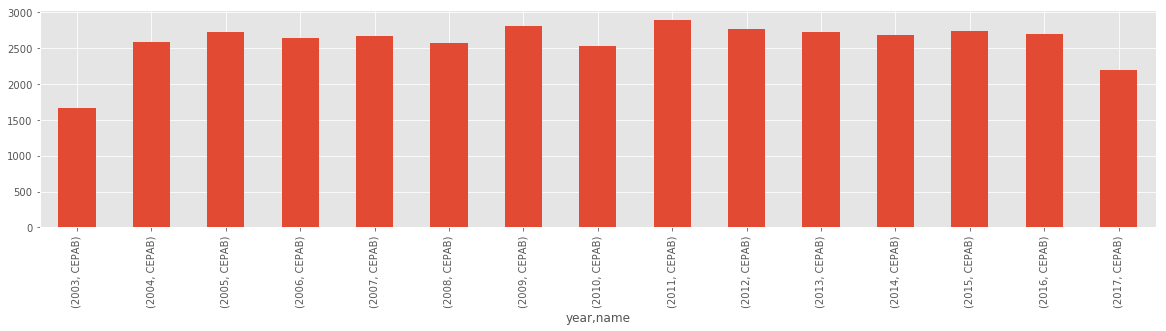

In [52]:
data[data['name']=='CEPAB'].groupby(['year','name']).sum()['uc'].plot.bar(figsize=(20,4))

### Acumulacion de unidades calor en la estacion CEPAB en 2016 por mes

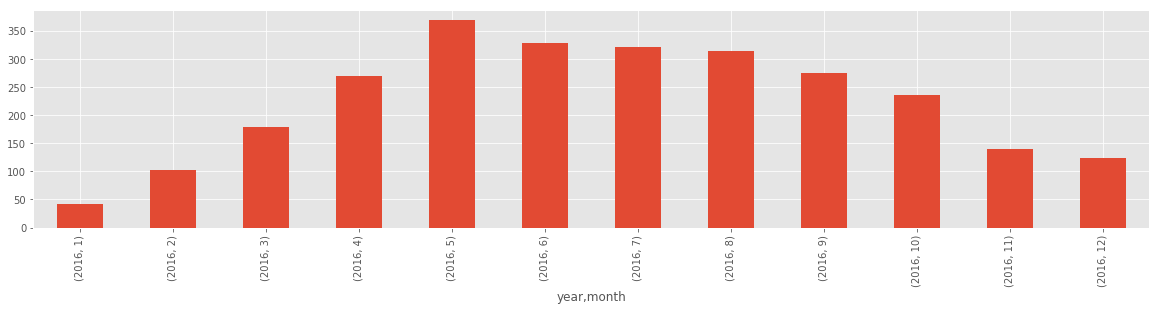

In [53]:
data[(data['name']=='CEPAB') & (data['year']==2016)].groupby(['year','month']).sum()['uc'].plot.bar(figsize=(20,4))

### Acumulacion de unidades calor por estacion en 2016

In [54]:
data[data['year']==2016].groupby(['year','month','name']).sum()['uc']

year  month  name                   
2016  1      CEPAB                       41.85
             Ciénega Grande              41.90
             Don Primo                   42.85
             El Becerro                  79.45
             El Cedazo                   99.00
             El Chiquihuitero           165.85
             El Colorín                  73.45
             El Laurel                   37.70
             El Potrerito                43.10
             Granja Elsa                 73.35
             Huizache                    71.25
             La Boquilla                 21.90
             La Codorniz                135.85
             La Lagunita                 41.55
             La Posta                    47.10
             La Posta II                 69.85
             La Salada                   55.40
             Los Gavilanes               94.45
             Los Pinos                   25.15
             Makelisa                    41.80
             Medio Kilo

### Histograma unidades calor

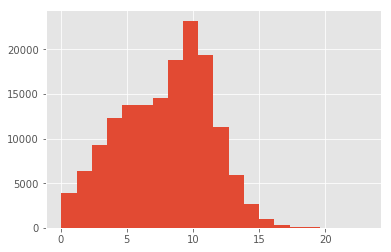

In [55]:
data['uc'].hist(bins=20)

In [56]:
data['uc'].mean()

7.890455741306011

### Dias de lluvia

In [57]:
data['rainDay'] = [1 if x > 0.0 else 0 for x in data['rain']]

In [58]:
data.head()

,number,name,lat,long,year,month,day,rain,tmax,tmin,humr,tmed,dpoint,uc,rainDay
0,2,La Mirinda,22.248528,-102.251778,2013,2,1,0.0,28.6,8.2,28.69,18.40,-0.177856,8.40,0
1,2,La Mirinda,22.248528,-102.251778,2013,2,2,0.0,28.6,4.6,43.80,16.60,4.154008,6.60,0
2,2,La Mirinda,22.248528,-102.251778,2013,2,3,0.0,24.8,0.3,47.47,12.55,1.585546,2.55,0
3,2,La Mirinda,22.248528,-102.251778,2013,2,4,0.0,25.9,1.6,43.51,13.75,1.462383,3.75,0
4,2,La Mirinda,22.248528,-102.251778,2013,2,5,0.0,25.9,0.6,43.82,13.25,1.105996,3.25,0


### Dias sin lluvia

In [59]:
data['noRainDay'] = [1 if x == 0.0 else 0 for x in data['rain']]

In [60]:
data.head()

,number,name,lat,long,year,month,day,rain,tmax,tmin,humr,tmed,dpoint,uc,rainDay,noRainDay
0,2,La Mirinda,22.248528,-102.251778,2013,2,1,0.0,28.6,8.2,28.69,18.40,-0.177856,8.40,0,1
1,2,La Mirinda,22.248528,-102.251778,2013,2,2,0.0,28.6,4.6,43.80,16.60,4.154008,6.60,0,1
2,2,La Mirinda,22.248528,-102.251778,2013,2,3,0.0,24.8,0.3,47.47,12.55,1.585546,2.55,0,1
3,2,La Mirinda,22.248528,-102.251778,2013,2,4,0.0,25.9,1.6,43.51,13.75,1.462383,3.75,0,1
4,2,La Mirinda,22.248528,-102.251778,2013,2,5,0.0,25.9,0.6,43.82,13.25,1.105996,3.25,0,1


### Generar indice de lluvia para el 2016

In [61]:
#%% Aggregation
aggregations = {
        'rainDay' : ['sum'],
        'noRainDay' : ['sum'],
        'rain' : ['sum']
        }

#%% Apply aggregation
group2 = data.groupby(['year', 'month', 'name']).agg(aggregations)

In [62]:
group2.columns = ["_".join(x) for x in group2.columns.ravel()]

In [63]:
group2.to_csv('../data/data_course_aguascalientes_indice_lluvia.csv')

In [64]:
data2 = pd.read_csv('../data/data_course_aguascalientes_indice_lluvia.csv')

In [65]:
data2.head()

,year,month,name,rainDay_sum,noRainDay_sum,rain_sum
0,2002,1,Cuauhtémoc,1,28,6.8
1,2002,1,Don Primo,1,23,5.4
2,2002,1,La Lagunita,1,23,4.6
3,2002,1,La Salada,0,29,0.0
4,2002,1,Los Pinos,0,18,0.0


In [66]:
data2.groupby(['month']).mean()

,year,rainDay_sum,noRainDay_sum,rain_sum
month,,,,
1,2010.517162,2.064073,25.377574,8.107551
2,2010.448430,2.134529,24.374439,10.608296
3,2010.438202,1.865169,28.426966,7.024719
4,2010.390625,1.147321,28.587054,2.537723
5,2010.287912,4.868132,25.720879,16.615824
6,2010.281659,11.117904,18.679039,85.282096
7,2010.346667,15.528889,15.133333,130.062000
8,2010.329670,13.773626,16.859341,106.790549
9,2010.335512,11.407407,17.309368,88.400000


In [67]:
data.head()

,number,name,lat,long,year,month,day,rain,tmax,tmin,humr,tmed,dpoint,uc,rainDay,noRainDay
0,2,La Mirinda,22.248528,-102.251778,2013,2,1,0.0,28.6,8.2,28.69,18.40,-0.177856,8.40,0,1
1,2,La Mirinda,22.248528,-102.251778,2013,2,2,0.0,28.6,4.6,43.80,16.60,4.154008,6.60,0,1
2,2,La Mirinda,22.248528,-102.251778,2013,2,3,0.0,24.8,0.3,47.47,12.55,1.585546,2.55,0,1
3,2,La Mirinda,22.248528,-102.251778,2013,2,4,0.0,25.9,1.6,43.51,13.75,1.462383,3.75,0,1
4,2,La Mirinda,22.248528,-102.251778,2013,2,5,0.0,25.9,0.6,43.82,13.25,1.105996,3.25,0,1


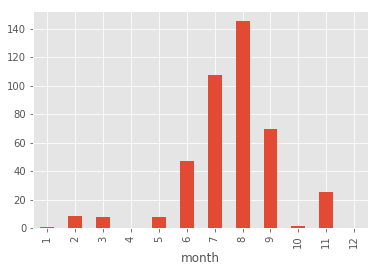

In [91]:
data[(data['name'] == 'CEPAB') & (data['year']== 2016)].groupby(['month']).sum()['rain'].plot.bar()